In [5]:
import pandas as pd
import numpy as np
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from copy import deepcopy
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname = "C:\Windows\Fonts\simhei.ttf", size = 14)
sns.set(font = myfont.get_name())
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # 一个cell显示多输出
pd.set_option('display.max_rows', 100) # 设置最大显示100行
pd.set_option('display.max_columns', 100) # 设置最大显示100列

In [6]:
cleanedDataPcf = pd.read_csv("CleanedData/pacifier.csv", index_col = 0, parse_dates=['review_date'])

encodedDataPcf = deepcopy(cleanedDataPcf)

cleanedDataMcw = pd.read_csv("CleanedData/microwave.csv", index_col = 0, parse_dates=['review_date'])

encodedDataMcw = deepcopy(cleanedDataMcw)

cleanedDataHdr = pd.read_csv("CleanedData/hair_dryer.csv", index_col = 0, parse_dates=['review_date'])

encodedDataHdr = deepcopy(cleanedDataHdr)

In [7]:
encodedDataPcf = encodedDataPcf[["customer_id", "review_id", 
                                 "product_id", "star_rating", 
                                 "helpful_votes", "total_votes", 
                                 "vine", "verified_purchase", 
                                 "review_headline", "review_body", 
                                "review_date"]]

encodedDataMcw = encodedDataMcw[["customer_id", "review_id", 
                                 "product_id", "star_rating", 
                                 "helpful_votes", "total_votes", 
                                 "vine", "verified_purchase", 
                                 "review_headline", "review_body", 
                                "review_date"]]

encodedDataHdr = encodedDataHdr[["customer_id", "review_id", 
                                 "product_id", "star_rating", 
                                 "helpful_votes", "total_votes", 
                                 "vine", "verified_purchase", 
                                 "review_headline", "review_body", 
                                "review_date"]]

只提取有意义的特征

In [8]:
encodedDataPcf["vine"] = (encodedDataPcf["vine"] == 'Y') | (encodedDataPcf["vine"] == 'y')

encodedDataMcw["vine"] = (encodedDataMcw["vine"] == 'Y') | (encodedDataMcw["vine"] == 'y')

encodedDataHdr["vine"] = (encodedDataHdr["vine"] == 'Y') | (encodedDataHdr["vine"] == 'y')

encodedDataPcf["verified_purchase"] = (encodedDataPcf["verified_purchase"] == 'Y') | (encodedDataPcf["verified_purchase"] == 'y')

encodedDataMcw["verified_purchase"] = (encodedDataMcw["verified_purchase"] == 'Y') | (encodedDataMcw["verified_purchase"] == 'y')

encodedDataHdr["verified_purchase"] = (encodedDataHdr["verified_purchase"] == 'Y') | (encodedDataHdr["verified_purchase"] == 'y')

把逻辑特征转为布尔值

In [9]:
encodedDataPcf["product_id"] = encodedDataPcf["product_id"].str.upper()

encodedDataMcw["product_id"] = encodedDataMcw["product_id"].str.upper()

encodedDataHdr["product_id"] = encodedDataHdr["product_id"].str.upper()

encodedDataPcf["customer_id"] = encodedDataPcf["customer_id"].astype("str")

encodedDataMcw["customer_id"] = encodedDataMcw["customer_id"].astype("str")

encodedDataHdr["customer_id"] = encodedDataHdr["customer_id"].astype("str")

encodedDataPcf["review_id"] = encodedDataPcf["review_id"].str.upper()

encodedDataMcw["review_id"] = encodedDataMcw["review_id"].str.upper()

encodedDataHdr["review_id"] = encodedDataHdr["review_id"].str.upper()

处理Unique Id

In [10]:
customerDataBase = {
    
}
"""
helpfulnessRatio [helpful, total]
isVine [bool]
purchasedRatio [purchased, total]
"""

for id in encodedDataPcf["customer_id"] :
    
    if(id not in customerDataBase) : customerDataBase[id] = {"helpfulnessRatio" : [1, 2], "isVine" : False, "purchasedRatio" : [0, 0]}
    
for id in encodedDataMcw["customer_id"] :
    
    if(id not in customerDataBase) : customerDataBase[id] = {"helpfulnessRatio" : [1, 2], "isVine" : False, "purchasedRatio" : [0, 0]}
    
for id in encodedDataHdr["customer_id"] :
    
    if(id not in customerDataBase) : customerDataBase[id] = {"helpfulnessRatio" : [1, 2], "isVine" : False, "purchasedRatio" : [0, 0]}

        
for i in range(0, len(encodedDataPcf)) :
    
    row = encodedDataPcf.iloc[i]
    
    customerDataBase[row["customer_id"]]["helpfulnessRatio"][0] += row["helpful_votes"]
    
    customerDataBase[row["customer_id"]]["helpfulnessRatio"][1] += row["total_votes"]
    
    customerDataBase[row["customer_id"]]["isVine"] |= row["vine"]
    
    customerDataBase[row["customer_id"]]["purchasedRatio"][0] += row["verified_purchase"]
    
    customerDataBase[row["customer_id"]]["purchasedRatio"][1] += 1
    
for i in range(0, len(encodedDataMcw)) :
    
    row = encodedDataMcw.iloc[i]
    
    customerDataBase[row["customer_id"]]["helpfulnessRatio"][0] += row["helpful_votes"]
    
    customerDataBase[row["customer_id"]]["helpfulnessRatio"][1] += row["total_votes"]
    
    customerDataBase[row["customer_id"]]["isVine"] |= row["vine"]
    
    customerDataBase[row["customer_id"]]["purchasedRatio"][0] += row["verified_purchase"]
    
    customerDataBase[row["customer_id"]]["purchasedRatio"][1] += 1
    

for i in range(0, len(encodedDataHdr)) :
    
    row = encodedDataHdr.iloc[i]
    
    customerDataBase[row["customer_id"]]["helpfulnessRatio"][0] += row["helpful_votes"]
    
    customerDataBase[row["customer_id"]]["helpfulnessRatio"][1] += row["total_votes"]
    
    customerDataBase[row["customer_id"]]["isVine"] |= row["vine"]
    
    customerDataBase[row["customer_id"]]["purchasedRatio"][0] += row["verified_purchase"]
    
    customerDataBase[row["customer_id"]]["purchasedRatio"][1] += 1
    

'\nhelpfulnessRatio [helpful, total]\nisVine [bool]\npurchasedRatio [purchased, total]\n'

生成评论者数据库，注意有用性投票经过了拉普拉斯平滑

In [11]:
# customerDataBase

In [12]:
productDataBasePcf = {
    
}
productDataBaseMcw = {
    
}
productDataBaseHdr = {
    
}
"""
reviews
"""

for id in encodedDataPcf["product_id"] :
    
    if(id not in productDataBasePcf) : productDataBasePcf[id] = []
    
for id in encodedDataMcw["product_id"] :
    
    if(id not in productDataBaseMcw) : productDataBaseMcw[id] = []
        
for id in encodedDataHdr["product_id"] :
    
    if(id not in productDataBaseHdr) : productDataBaseHdr[id] = []
    
        
for i in range(0, len(encodedDataPcf)) :
    
    row = encodedDataPcf.iloc[i]
    
    productDataBasePcf[row["product_id"]].append(row)
    
for i in range(0, len(encodedDataMcw)) :
    
    row = encodedDataMcw.iloc[i]
    
    productDataBaseMcw[row["product_id"]].append(row)

for i in range(0, len(encodedDataHdr)) :
    
    row = encodedDataHdr.iloc[i]
    
    productDataBaseHdr[row["product_id"]].append(row)


'\nreviews\n'

In [13]:
encodedProductDataBasePcf = {
    
}
encodedProductDataBaseMcw = {
    
}
encodedProductDataBaseHdr = {
    
}
"""
rating
truthnesss(Reputation of reviewer)
NLP score
"""

for id in productDataBasePcf :
    reviews = productDataBasePcf[id]
    
    encodedProductDataBasePcf[id] = []
    
    for i in reviews :
        
        reviewHeadline = i["review_headline"]
        
        reviewBody = str(i["review_body"])
        
        reviewBody = reviewBody.replace("<br/>", "")
        
        # print(word_tokenize(reviewBody))
        
        encodedProductDataBasePcf[id].append(
        [
            int(i["star_rating"]), 
            customerDataBase[i["customer_id"]]["helpfulnessRatio"][0] / customerDataBase[i["customer_id"]]["helpfulnessRatio"][1], 
            0, 
            i["review_date"]
        ])

'\nrating\ntruthnesss(Reputation of reviewer)\nNLP score\n'

In [14]:
# encodedProductDataBasePcf

合并评论

In [15]:
def merge_review(df):
    df['review_headline'] = df['review_headline'].apply(str)
    df['review_body'] = df['review_body'].apply(str)
    df['review'] = df['review_headline'] + '. ' + df['review_body']

In [16]:
merge_review(encodedDataPcf)

merge_review(encodedDataMcw)

merge_review(encodedDataHdr)

In [17]:
encodedDataPcf = encodedDataPcf.drop(['review_headline', 'review_body'], axis=1)

encodedDataMcw = encodedDataMcw.drop(['review_headline', 'review_body'], axis=1)

encodedDataHdr = encodedDataHdr.drop(['review_headline', 'review_body'], axis=1)

获取评论情感评分

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def get_review_score(sentence: str) -> float:
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(sentence)
    score = score['compound']

    return score

In [19]:
encodedDataPcf['review_score'] = encodedDataPcf['review'].map(get_review_score)

encodedDataMcw['review_score'] = encodedDataMcw['review'].map(get_review_score)

encodedDataHdr['review_score'] = encodedDataHdr['review'].map(get_review_score)

In [20]:
encodedDataPcf.head()

encodedDataMcw.head()

encodedDataHdr.head()

,customer_id,review_id,product_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_date,review,review_score
0,40626522,R1A3ZUBR8TSAKY,B00793CZAE,5,0,0,False,True,2015-08-31,Love this!. Perfect match for the Gund Huggybu...,0.9020
1,16290022,RLJNYBK4FGBYX,B003PCYMP4,5,0,0,False,True,2015-08-31,Love 💕. My little girl love this paci contrapt...,0.9289
2,10216509,R26QCW75C4JDOK,B003CK3LDI,5,0,0,False,True,2015-08-31,Five Stars. My son loves this one and will onl...,0.5719
3,114040,R2E7N0TVLUHUDR,B003CK3LDI,5,0,0,False,True,2015-08-31,Five Stars. Perfect,0.5719
4,27971579,R1SO9VMCIGZX3U,B003PCYMP4,5,0,0,False,True,2015-08-31,Five Stars. Amazing addition to the nursery!,0.6239


,customer_id,review_id,product_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_date,review,review_score
0,21879631,RY52KZABZK8QF,B0052G14E8,1,0,0,False,True,2015-08-31,Do not recommend it. go use your money for som...,-0.7375
1,14964566,R3GCOEV4HYZG2I,B0055UBB4O,5,0,0,False,True,2015-08-31,Looks as good as the picture. Didn't use it lo...,0.6452
2,13230389,R1V2OPPNL0QGCE,B0052G14E8,4,0,0,False,True,2015-08-31,"Four Stars. Very nice microwave, great price",0.8155
3,43655888,R9Q0QDTLKV567,B004ZU09QQ,3,0,1,False,True,2015-08-31,"quiet. Quiet, but does not seem like 1000 watt...",-0.3950
4,117794,R3DL7HYC3QTWNI,B005GSZB7I,4,0,0,False,True,2015-08-31,Four Stars. It's bigger than I thought.,0.0000


,customer_id,review_id,product_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_date,review,review_score
0,34678741,R9T1FE2ZX2X04,B003V264WW,5,0,0,False,True,2015-08-31,Works great. Works great!,0.8588
1,11599505,RE36JAD5V53PO,B0009XH6V4,4,0,0,False,True,2015-08-31,I love travel blow dryers because they are eas...,0.9647
2,2282190,RIDHM8B7SCCV3,B0007NZPY6,5,0,1,False,True,2015-08-31,Five Stars. Love this dryer!,0.6696
3,43669858,R14QGWPCHU9LSE,B00BB8ZIW0,5,0,0,False,True,2015-08-31,Five Stars. styling hair in style,0.0000
4,107098,R35BHQJHXXJD59,B003V264WW,4,0,0,False,False,2015-08-31,I think's great. The cord length is perfect. I...,0.9485


词频统计

In [21]:
from nltk import FreqDist

def freq_words(x, terms=20):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n=terms)
    plt.figure()
    ax = sns.barplot(data=d, x="count" , y="word")
    ax.set(ylabel = 'word')

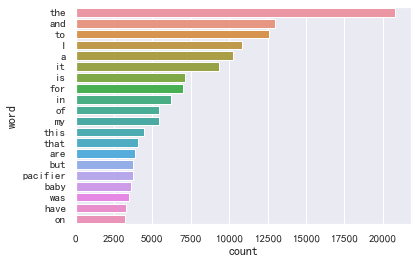

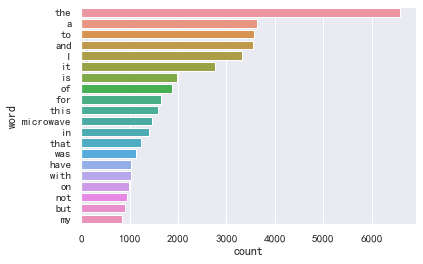

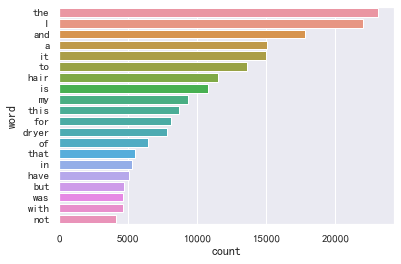

In [22]:
freq_words(encodedDataPcf['review'])

freq_words(encodedDataMcw['review'])

freq_words(encodedDataHdr['review'])

去除停用词后的词频统计

In [23]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def remove_stopwords(rev):
    rev = rev.apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
    rev_new = rev.apply(lambda x:" ".join([w for w in x.split() if w not in stop_words]))
    rev_new = rev_new.apply(str.lower)
    
    return rev_new

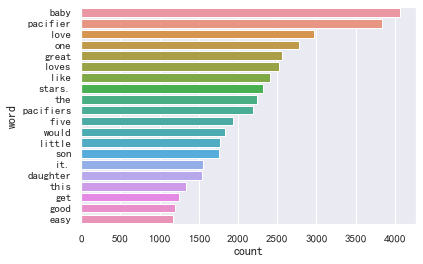

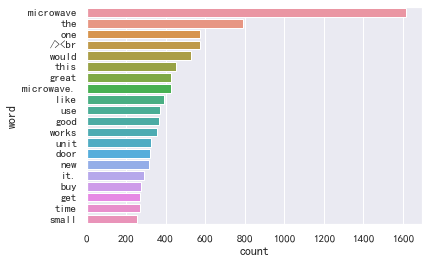

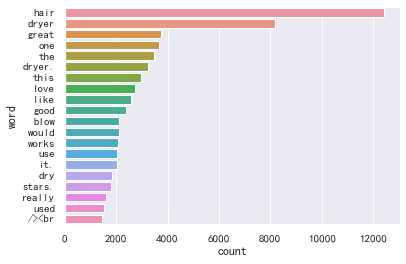

In [24]:
freq_words(remove_stopwords(encodedDataPcf['review']))

freq_words(remove_stopwords(encodedDataMcw['review']))

freq_words(remove_stopwords(encodedDataHdr['review']))

In [25]:
PcfReview = remove_stopwords(encodedDataPcf['review'])

McwReview = remove_stopwords(encodedDataMcw['review'])

HdrReview = remove_stopwords(encodedDataHdr['review'])

PcfAllReview = "".join(PcfReview.tolist())

McwAllReview = "".join(McwReview.tolist())

HdrAllReview = "".join(HdrReview.tolist())

# print(PcfAllReview)

词云制作

In [38]:
import PIL.Image as image
import numpy as np

Pcf_mask = np.array(image.open("./materials/Pcf.png"))

Mcw_mask = np.array(image.open("./materials/Mcw.png"))

Hdr_mask = np.array(image.open("./materials/Hdr.png"))

In [84]:
from wordcloud import WordCloud

Pcfwordcloud = WordCloud(mask=Pcf_mask, background_color='#FFFFFF', repeat=False).generate(PcfAllReview)

Mcwwordcloud = WordCloud(mask=Mcw_mask, background_color='#FFFFFF', repeat=False).generate(McwAllReview)

Hdrwordcloud = WordCloud(mask=Hdr_mask, background_color='#FFFFFF', repeat=False).generate(HdrAllReview)

(-0.5, 599.5, 599.5, -0.5)

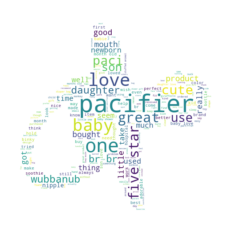

In [85]:
plt.imshow(Pcfwordcloud, interpolation='bilinear')
plt.axis("off") # 去掉坐标轴

(-0.5, 799.5, 799.5, -0.5)

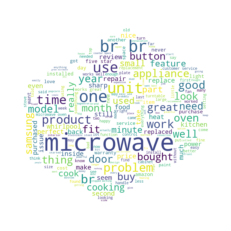

In [86]:
plt.imshow(Mcwwordcloud, interpolation='bilinear')
plt.axis("off") # 去掉坐标轴

(-0.5, 511.5, 462.5, -0.5)

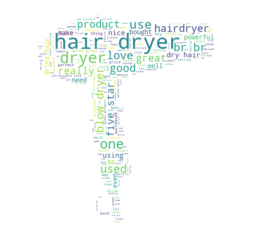

In [87]:
plt.imshow(Hdrwordcloud, interpolation='bilinear')
plt.axis("off") # 去掉坐标轴

In [88]:
Pcfwordcloud.to_file("./Image/Pcf.png")

Mcwwordcloud.to_file("./Image/Mcw.png")

Hdrwordcloud.to_file("./Image/Hdr.png")

In [56]:
PcfReview[0]

'love this!. perfect match gund huggybuddy bought baby gift.'

修饰词获取

In [57]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import wordnet

def get_advs(sen: str)->list:
    advs = []
    words = word_tokenize(sen)
    pos_word = nltk.pos_tag(words)
    for word in pos_word:
        if word[1] == 'RB':
            advs.append(word[0])

    return advs

非完整副词

In [58]:
all_advs = []
all_review = PcfReview.tolist() + McwReview.tolist() + HdrReview.tolist()
for review in all_review:
    all_advs.extend(get_advs(review))

not_all_advs_list = nltk.pos_tag(list(set(all_advs)))

In [64]:
print(len(not_all_advs_list))

2026


In [68]:
for index, each in enumerate(not_all_advs_list):
    if each[1] != 'RB':
        del not_all_advs_list[index]

In [74]:
new_all_advs_list = not_all_advs_list

len(new_all_advs_list)

1268

评论中所有修饰词

In [82]:
for index, each in enumerate(new_all_advs_list):
    if each[1] != 'RB':
        del not_all_advs_list[index]

In [83]:
len(new_all_advs_list)

798